In [2]:
from utils2 import *
import time
from significance_of_mean_cuda import significance_of_mean_cuda

### Get synthetic data

In [3]:
num_examples = 1
N = [50,100, 150, 200, 250]
s =  [10, 50, 100, 200]
path = "figures/parallelVsSingleThread"

In [4]:
def runExperiment():
    cpu1 = list()
    gpu1 = list()
    n = N[1]
    for bins in s:
        np.random.seed(42)
        A = np.asarray([np.random.normal(0, 1, n) for _ in range(num_examples)])
        B = np.asarray([np.random.normal(1, 1, n) for _ in range(num_examples)])

        start = time.time()
        SGM = significance_of_mean_cuda(bins,dtype_v=np.uint16,dtype_A=np.float64)
        SGM.run(A,B)
        p = SGM.get_p_values()
        end = time.time()
        t_gpu = end - start
        gpu1.append(t_gpu)
        print("GPU: ", t_gpu)
    
    
        start = time.time()
        P = calibration_test(A,B,bins)
        end = time.time()
        t_cpu = end - start
        cpu1.append(t_cpu)
        print("CPU1: ",t_cpu)
    
        print(np.allclose(p,P))
    return cpu1, gpu1
    

This data requires 0.8294119999999999 MiB on the GPU.
GPU:  0.038080692291259766
CPU1:  0.13553214073181152
True
This data requires 4.8581 MiB on the GPU.
GPU:  0.022197246551513672
CPU1:  1.0985867977142334
True
This data requires 9.877396 MiB on the GPU.
GPU:  0.02461695671081543
CPU1:  2.2212538719177246
True
This data requires 19.948308 MiB on the GPU.
GPU:  0.04579782485961914
CPU1:  4.6184914112091064
True


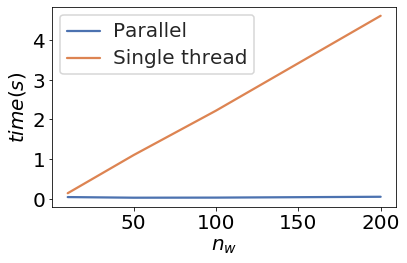

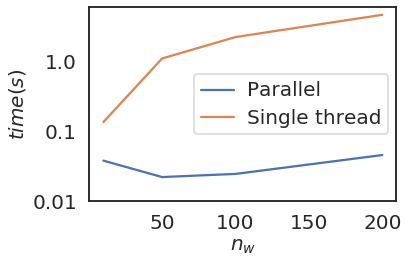

In [5]:
if __name__=="__main__":
    cpu1, gpu1 = runExperiment()
    timePlotSNS(np.array(gpu1), np.array(cpu1), np.array(s), log=False, path=getPATH(path, "nonLog"))
    timePlotSNS(np.log10(np.array(gpu1)), np.log10(np.array(cpu1)), np.array(s), log=True, path=getPATH(path, "Log"))